## Final Project

ISM6644 – Python Fundamentals for Business Analytics
Dr. Tala Mirzaei

Tanairis Janes 
Yukti Kamthan 
Rithanya Sekar 
Theodore Atis

In [299]:
import pandas as pd

import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('Consumer_Data_Final Project.csv')

df.head()

Service  Age    CustomerSince Customer Gender   Region  \
0     fiber   29  6/23/2010 10:27               M    North   
1        4G   74  6/23/2010 10:27               M    North   
2     phone   34  6/23/2010 10:27               F  Central   
3     phone   60  6/24/2010 10:27               M    North   
4  landline   29  6/24/2010 10:27               M  Central   

   SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                     2         61.0            0.32                 5.0   
1                     0         48.0            0.02                 3.0   
2                     0         34.0            0.02                 4.0   
3                     5         70.0            0.23                 5.0   
4                     5         40.0            0.09                 5.0   

   Unnamed: 9  Unnamed: 10  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN

### Data Cleaning and Preparation

In [301]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Service                    0
Age                        0
CustomerSince              0
Customer Gender            0
Region                     0
SupportCallsLastYear       0
AverageBill                3
ChurnIndicator             0
Satisfaction Score         2
Unnamed: 9              9993
Unnamed: 10             9993
dtype: int64


In [302]:
# Replace missing value by average of the column

mean=df['AverageBill'].mean()

df.fillna({'AverageBill': mean}, inplace=True)

#Check the number of missing values in a column
df['AverageBill'].isna().sum()


0

In [303]:
mean1=df['Satisfaction Score'].mean()

df.fillna({'Satisfaction Score': mean1}, inplace=True)

#Check the number of missing values in a column
df['Satisfaction Score'].isna().sum()

0

In [304]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Service                    0
Age                        0
CustomerSince              0
Customer Gender            0
Region                     0
SupportCallsLastYear       0
AverageBill                0
ChurnIndicator             0
Satisfaction Score         0
Unnamed: 9              9993
Unnamed: 10             9993
dtype: int64


In [305]:
#Remove empty columns

df_cleaned = df.dropna(axis=1, how='all')

df_cleaned.head()

Service  Age    CustomerSince Customer Gender   Region  \
0     fiber   29  6/23/2010 10:27               M    North   
1        4G   74  6/23/2010 10:27               M    North   
2     phone   34  6/23/2010 10:27               F  Central   
3     phone   60  6/24/2010 10:27               M    North   
4  landline   29  6/24/2010 10:27               M  Central   

   SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  
0                     2         61.0            0.32                 5.0  
1                     0         48.0            0.02                 3.0  
2                     0         34.0            0.02                 4.0  
3                     5         70.0            0.23                 5.0  
4                     5         40.0            0.09                 5.0

In [306]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Customer Gender       9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9993 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction Score    9993 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [307]:
#Detecting Outliers Using Z-Score
import numpy as np

# Calculate Z-scores
df_cleaned['z_scoreCI'] = (df_cleaned['ChurnIndicator'] - df_cleaned['ChurnIndicator'].mean()) / df_cleaned['ChurnIndicator'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierCI'] = df_cleaned['z_scoreCI'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
print(df_cleaned)

       Service  Age     CustomerSince Customer Gender   Region  \
0        fiber   29   6/23/2010 10:27               M    North   
1           4G   74   6/23/2010 10:27               M    North   
2        phone   34   6/23/2010 10:27               F  Central   
3        phone   60   6/24/2010 10:27               M    North   
4     landline   29   6/24/2010 10:27               M  Central   
...        ...  ...               ...             ...      ...   
9988  landline   72  12/13/2015 10:27               M    North   
9989        4G   29  12/13/2015 10:27               F  Central   
9990     phone   41  12/14/2015 10:27               M  Central   
9991        4G   43  12/14/2015 10:27               F  Central   
9992        4G   76  12/14/2015 10:27               M  Central   

      SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                        2         61.0            0.32                 5.0   
1                        0         48.0          

/var/folders/8c/941r_n_s2fbc454lbfjb5fxh0000gn/T/ipykernel_21270/4197099815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['z_scoreCI'] = (df_cleaned['ChurnIndicator'] - df_cleaned['ChurnIndicator'].mean()) / df_cleaned['ChurnIndicator'].std()


In [308]:
# Calculate Z-scores
df_cleaned['z_scoreSS'] = (df_cleaned['Satisfaction Score'] - df_cleaned['Satisfaction Score'].mean()) / df_cleaned['Satisfaction Score'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierSS'] = df_cleaned['z_scoreSS'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
print(df_cleaned)

       Service  Age     CustomerSince Customer Gender   Region  \
0        fiber   29   6/23/2010 10:27               M    North   
1           4G   74   6/23/2010 10:27               M    North   
2        phone   34   6/23/2010 10:27               F  Central   
3        phone   60   6/24/2010 10:27               M    North   
4     landline   29   6/24/2010 10:27               M  Central   
...        ...  ...               ...             ...      ...   
9988  landline   72  12/13/2015 10:27               M    North   
9989        4G   29  12/13/2015 10:27               F  Central   
9990     phone   41  12/14/2015 10:27               M  Central   
9991        4G   43  12/14/2015 10:27               F  Central   
9992        4G   76  12/14/2015 10:27               M  Central   

      SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                        2         61.0            0.32                 5.0   
1                        0         48.0          

In [309]:
df_cleaned['is_outlierCI'].value_counts()

is_outlierCI
False    9616
True      377
Name: count, dtype: int64

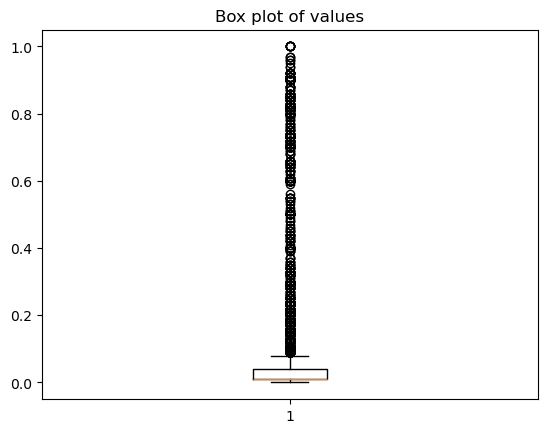

In [310]:
import matplotlib.pyplot as plt

# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['ChurnIndicator'])
plt.title('Box plot of values')
plt.show()

In [311]:
df_cleaned['is_outlierSS'].value_counts()

is_outlierSS
False    9993
Name: count, dtype: int64

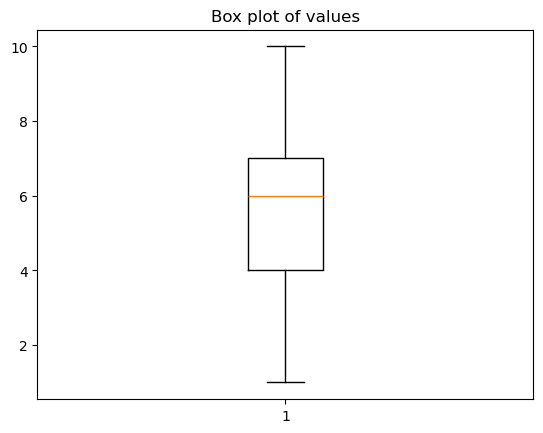

In [312]:
# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['Satisfaction Score'])
plt.title('Box plot of values')
plt.show()

In [313]:
# Calculate Z-scores
df_cleaned['z_scoreAB'] = (df_cleaned['AverageBill'] - df_cleaned['AverageBill'].mean()) / df_cleaned['AverageBill'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierAB'] = df_cleaned['z_scoreAB'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
print(df_cleaned)

       Service  Age     CustomerSince Customer Gender   Region  \
0        fiber   29   6/23/2010 10:27               M    North   
1           4G   74   6/23/2010 10:27               M    North   
2        phone   34   6/23/2010 10:27               F  Central   
3        phone   60   6/24/2010 10:27               M    North   
4     landline   29   6/24/2010 10:27               M  Central   
...        ...  ...               ...             ...      ...   
9988  landline   72  12/13/2015 10:27               M    North   
9989        4G   29  12/13/2015 10:27               F  Central   
9990     phone   41  12/14/2015 10:27               M  Central   
9991        4G   43  12/14/2015 10:27               F  Central   
9992        4G   76  12/14/2015 10:27               M  Central   

      SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                        2         61.0            0.32                 5.0   
1                        0         48.0          

In [314]:
outliers = np.where(np.abs(df_cleaned['is_outlierAB']) > threshold)

print(outliers)

(array([], dtype=int64),)


In [315]:
df_cleaned['is_outlierAB'].value_counts()

is_outlierAB
False    9993
Name: count, dtype: int64

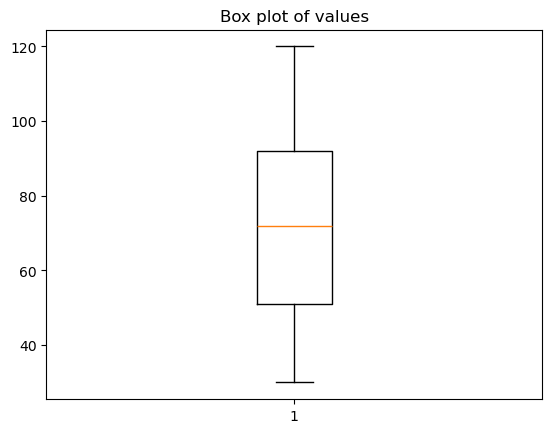

In [316]:
import matplotlib.pyplot as plt

# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['AverageBill'])
plt.title('Box plot of values')
plt.show()

In [317]:
# Detecting Outliers Using Interquartile Range (IQR)

Q1 = df_cleaned['ChurnIndicator'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_cleaned['ChurnIndicator'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Set thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
df_cleaned['is_outlier_CI_iqr'] = df['ChurnIndicator'].apply(lambda x: x < lower_bound or x > upper_bound)

# Display the dataset with outliers marked using IQR
print(df_cleaned)


       Service  Age     CustomerSince Customer Gender   Region  \
0        fiber   29   6/23/2010 10:27               M    North   
1           4G   74   6/23/2010 10:27               M    North   
2        phone   34   6/23/2010 10:27               F  Central   
3        phone   60   6/24/2010 10:27               M    North   
4     landline   29   6/24/2010 10:27               M  Central   
...        ...  ...               ...             ...      ...   
9988  landline   72  12/13/2015 10:27               M    North   
9989        4G   29  12/13/2015 10:27               F  Central   
9990     phone   41  12/14/2015 10:27               M  Central   
9991        4G   43  12/14/2015 10:27               F  Central   
9992        4G   76  12/14/2015 10:27               M  Central   

      SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                        2         61.0            0.32                 5.0   
1                        0         48.0          

In [339]:
# Handling Outliers by Replacing Them with the Median

median_value = df_cleaned['ChurnIndicator'].median()

print(median_value)

df_cleaned['ChurnIndicator'] = np.where(df_cleaned['is_outlier_CI_iqr'], median_value, df_cleaned['ChurnIndicator'])

print(df_cleaned)

0.01
       Service  Age     CustomerSince Customer Gender   Region  \
0        fiber   29   6/23/2010 10:27               M    North   
1           4G   74   6/23/2010 10:27               M    North   
2        phone   34   6/23/2010 10:27               F  Central   
3        phone   60   6/24/2010 10:27               M    North   
4     landline   29   6/24/2010 10:27               M  Central   
...        ...  ...               ...             ...      ...   
9988  landline   72  12/13/2015 10:27               M    North   
9989        4G   29  12/13/2015 10:27               F  Central   
9990     phone   41  12/14/2015 10:27               M  Central   
9991        4G   43  12/14/2015 10:27               F  Central   
9992        4G   76  12/14/2015 10:27               M  Central   

      SupportCallsLastYear  AverageBill  ChurnIndicator  Satisfaction Score  \
0                        2         61.0            0.01                 5.0   
1                        0         48.0     

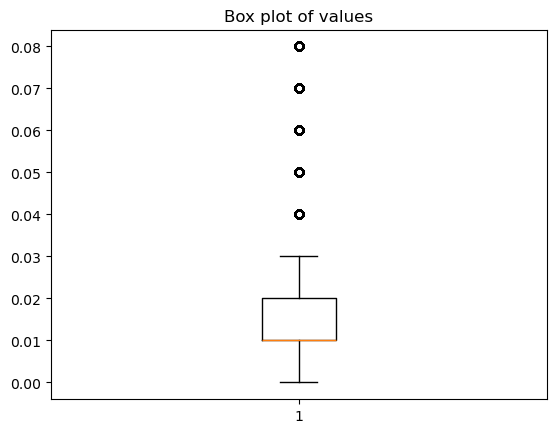

In [345]:
# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['ChurnIndicator'])
plt.title('Box plot of values')
plt.show()